<a href="https://colab.research.google.com/github/dinasquare/AIML_Work/blob/main/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING DEPENDENCIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
#IMPORTING DATASET
iris=pd.read_csv('/content/Iris.csv')

In [ ]:
#GIVES NUMBER OF ROWS AND COLUMNS
iris.shape

(150, 6)

In [ ]:
#GIVES TOTAL NUMBER OF ELEMENTS
iris.size

900

In [ ]:
#GIVES FIRST 5 VALUES
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# provides a concise summary of a DataFrame, including the index dtype and column dtypes, non-null values and memory usage
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#GIVES SUM OF NULL VALUES IN EACH COLUMN
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#GIVES STATISTICAL OVERVIEW
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#MAKES IT BOOTIFOOL
sns.set_theme()

<Axes: xlabel='Species', ylabel='count'>

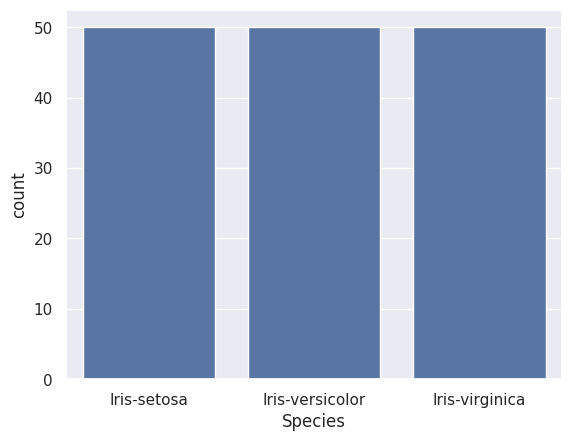

In [ ]:
#PLOTS COUNTPLOT
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
sns.countplot(x='Species',data=iris)

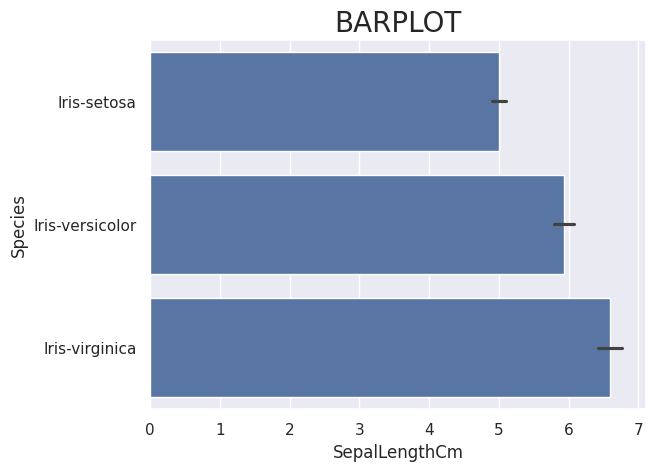

In [ ]:
#BARPLOT
sns.barplot(x="SepalLengthCm",y="Species",data=iris)
plt.title("BARPLOT", fontsize = 20);

<Figure size 400x400 with 0 Axes>

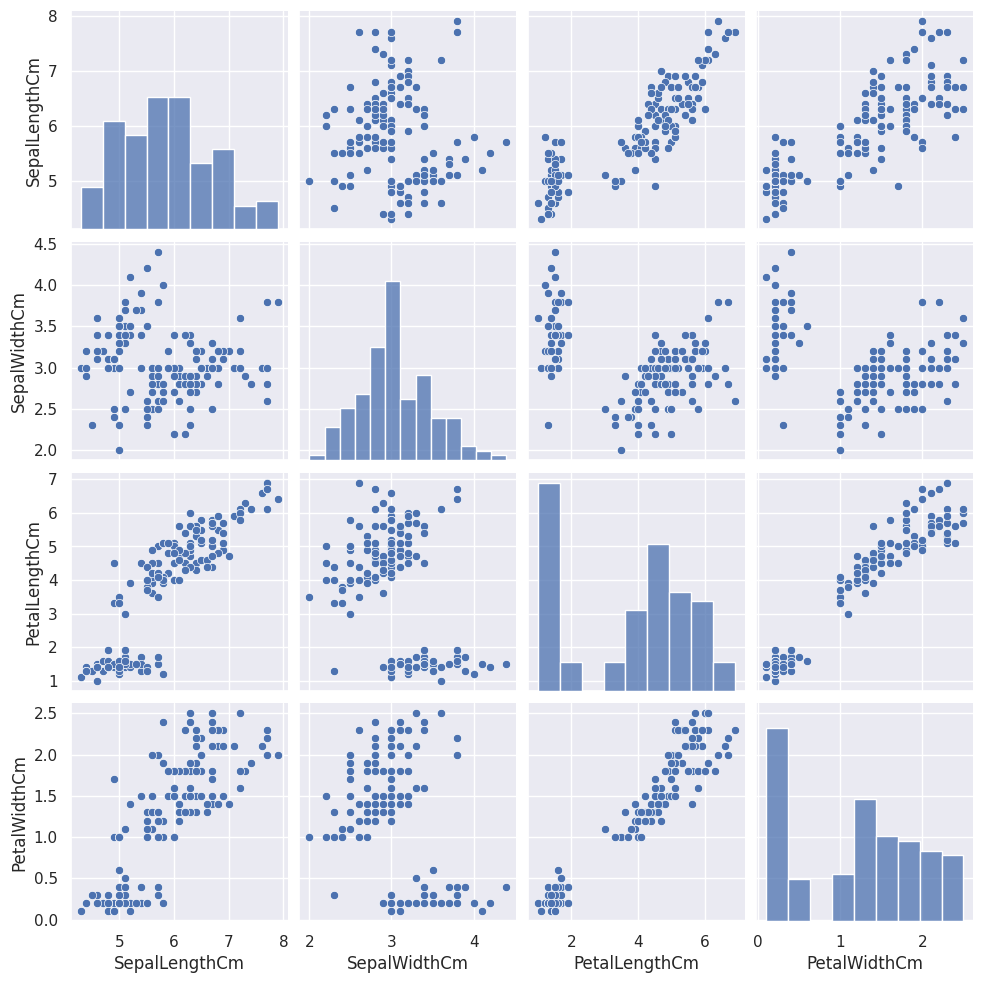

In [ ]:
#PAIRPLOT
plt.figure(figsize=(4,4))
sns.pairplot(iris, )

In [ ]:
#DROPPPING ID COLUMN
iris.drop(columns=['Id'],axis=1,inplace=True)

In [ ]:
#SPLITTING DATA INTO X(inputs) AND Y(output/target variable)
x=iris.iloc[:,0:-1]
y=iris.iloc[:,-1]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
#IMPORTING LABEL ENCODER for y
#label encoder is used to convert categorical data into numeric data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y) #fiting and transforming

In [ ]:
#NORMALIZATION USING MIIN MAX SCALER
#in normalization we bring data to a common scale without disturbing the differences in ranges of values
# MinMaxScaler is applied column-wise, Normalizer is applied row-wise.
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
t=scaler.fit(x)
std_x=t.transform(x)

In [ ]:
#SPLIITING DATA INTO TRAIN TEST SPLIT
# do after performing encoding and scaling operations
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
#IMPORTING A MODEL(DECISION TREE)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [ ]:
#FITTING/TRAINING THE MODEL
clf.fit(x_train , y_train)

DecisionTreeClassifier()

In [ ]:
#CALCULATING TRAINING ACCURACY
x_train_prediction = clf.predict(x_train)
training_data_accuracy=clf.score(x_train , y_train)
print(training_data_accuracy)

1.0


In [ ]:
#TESTING MODEL ON TEST DATA AND CALCULATING EFFICIENCY
test_data_accuracy=clf.score(x_test , y_test)
print(test_data_accuracy*100)

93.33333333333333


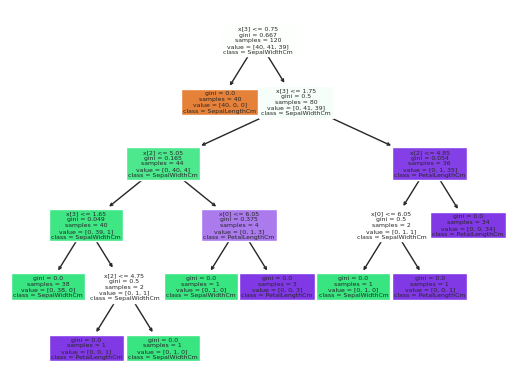

In [ ]:
#plotting the decision tree model
from sklearn.tree import plot_tree
plot_tree(clf, class_names = x_train.columns, filled = True);